In [3]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [2]:
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 48.5 MB/s 
     |████████████████████████████████| 4.0 MB 34.9 MB/s 
     |████████████████████████████████| 1.2 MB 38.0 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [5]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus) #문자 데이터를 입력받아서 리스트의 형태로 변환
total_words = len(tokenizer.word_index) + 1 #word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] #각 줄 단어를 index로 변환한 list
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1] #2, 3, 4, ...개 단어 연속
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences]) #여기선 11개
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words) #index 값에서 one-hot 형태로 변환

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 35.7MB/s]


In [6]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer, 마지막 time step만 출력
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [16]:
history = model.fit(predictors, label, epochs=10, verbose=1)

Epoch 1/10
484/484 [==============================] - 67s 138ms/step - loss: 3.9170 - accuracy: 0.2220
Epoch 2/10
484/484 [==============================] - 64s 133ms/step - loss: 3.8128 - accuracy: 0.2432
Epoch 3/10
484/484 [==============================] - 65s 135ms/step - loss: 3.7039 - accuracy: 0.2603
Epoch 4/10
484/484 [==============================] - 67s 137ms/step - loss: 3.6164 - accuracy: 0.2759
Epoch 5/10
484/484 [==============================] - 64s 133ms/step - loss: 3.5115 - accuracy: 0.2998
Epoch 6/10
484/484 [==============================] - 64s 133ms/step - loss: 3.4353 - accuracy: 0.3195
Epoch 7/10
484/484 [==============================] - 65s 134ms/step - loss: 3.3469 - accuracy: 0.3375
Epoch 8/10
484/484 [==============================] - 65s 133ms/step - loss: 3.2549 - accuracy: 0.3583
Epoch 9/10
484/484 [==============================] - 65s 135ms/step - loss: 3.1867 - accuracy: 0.3750
Epoch 10/10
484/484 [==============================] - 65s 135ms/step - l

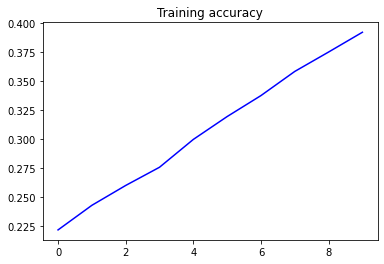

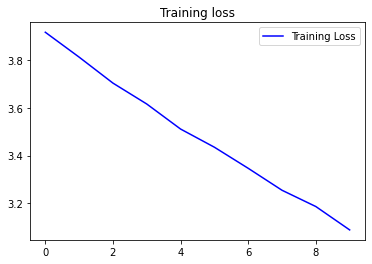

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope or all to show thee die new still bright can bright alone confounds thee so bad so bad new fears in gentle chest use defence refined brow spent spent hate history can twain prove prove thee ' bright bright alone confounds told me better leaves grow mad can owe mad hate set even so told me new young to fullness lend men new dead light tell to hell did smother light light confounds told me can resort confounds thee doth share a part of show it new old part of shame new long can know doth not not ever not
